In [1]:
pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# K-Nearest Neighbors (KNN)

# Predicting Breast Cancer:
In this project we will be using the Breast Cancer Wisconsin (Diagonistic) Data set from the uci Resipotry. We will be training a K-Nearest Neighbor(KNN) to predict whether a cell is Benign or Malingnant

In [2]:
# importing libs

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot
from pyforest import *


%matplotlib inline

# data source url = https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

In [3]:
col_name = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean'
            ,'compactness_mean','concavity_mean','points_mean','symentry_mean','dimension_mean','radisu_se','texture_se',
           'perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','point_se','symenty_se',
           'dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst',
            'compactness_worst','concavity_worst','points_worst','symentry_worst','dimension_worst']

df = pd.read_csv('wdbc.data', names=col_name)

<IPython.core.display.Javascript object>

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symentry_worst,dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 32)

<Axes: >

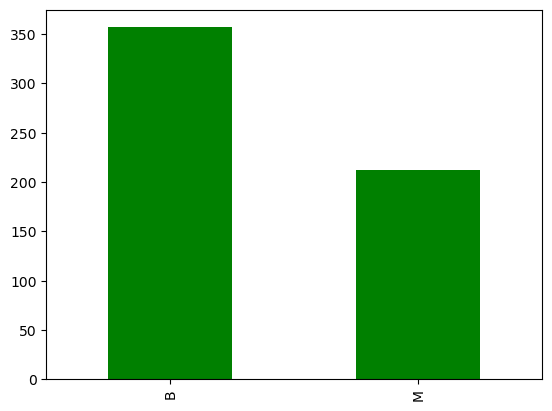

In [6]:
df['diagnosis'].value_counts().plot(kind = 'bar', color = 'green')

In [7]:
df.dtypes.head(2)

id            int64
diagnosis    object
dtype: object

In [8]:
df['diagnosis'] = df['diagnosis'].astype('category') # changing the datatype of diagnosis

In [9]:
df.dtypes.head(5)

id                   int64
diagnosis         category
radius_mean        float64
texture_mean       float64
perimeter_mean     float64
dtype: object

In [10]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
df=df.drop('id', axis=1)

In [12]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symentry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symentry_worst,dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# Spliting into labels and features 
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [14]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symentry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symentry_worst,dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
# Check data types
X.dtypes.head()

radius_mean        float64
texture_mean       float64
perimeter_mean     float64
area_mean          float64
smoothness_mean    float64
dtype: object

In [16]:
# lest standardize our data
from scipy.stats import zscore

Xscaled = X.apply(zscore)


In [17]:
Xscaled.describe().T.head(2)

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,-1.373633e-16,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
texture_mean,569.0,6.868164e-17,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889


In [18]:
Xscaled_df = pd.DataFrame(Xscaled)

<IPython.core.display.Javascript object>

In [19]:
Xscaled_df.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symentry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symentry_worst,dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


# Building KNN Model

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xscaled_df, y, test_size=0.3, random_state=1)

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5, weights='distance')

KNN.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [21]:
print(KNN)  # Check model configuration


KNeighborsClassifier(weights='distance')


In [22]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)


X_test shape: (171, 30)
X_train shape: (398, 30)


In [23]:
p = KNN.predict(X_test)
p

array(['B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B'], dtype=object)

In [24]:
round(KNN.score(X_test,y_test)*100,2) # checking the score of the model: KNN.score(X_test,y_test)

95.32

Confusion Matrix


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

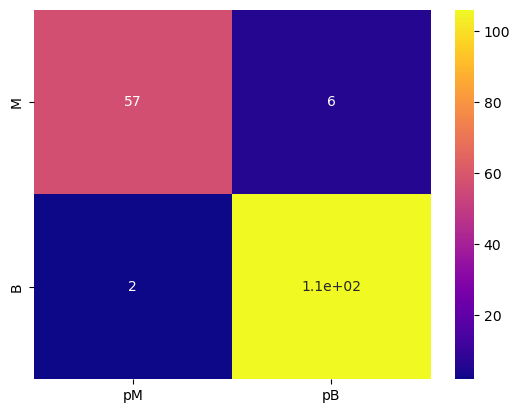

In [25]:
# Perfroming confusion matrix

from sklearn import metrics

print('Confusion Matrix')

cm = metrics.confusion_matrix(y_test, p, labels = ['M','B'])
df_cm = pd.DataFrame(cm, index=[i for i in ['M','B']],columns = [i for i in ['pM','pB']]) # pM:predicte M,pB:predicted B

sns.heatmap(df_cm, annot=True, cmap='plasma');

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Classification Report')
print(metrics.classification_report(y_test,p, labels=['M','B']))

Classification Report
              precision    recall  f1-score   support

           M       0.97      0.90      0.93        63
           B       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [27]:
Xscaled_df = np.ascontiguousarray(Xscaled_df) # making Xscaled_df compartible for cross_val_score

from sklearn.model_selection import cross_val_score

scores_1 = []

for i in range(1,50):
    KNN_2 = KNeighborsClassifier(n_neighbors=i)
    score_2=cross_val_score(KNN_2,Xscaled_df,y,cv=10)
    scores_1.append(score_2.mean())

<IPython.core.display.Javascript object>

In [28]:
print(score_2)
print(len(scores_1))

[0.96491228 0.92982456 0.9122807  0.94736842 0.96491228 0.98245614
 0.92982456 0.98245614 0.98245614 0.94642857]
49


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

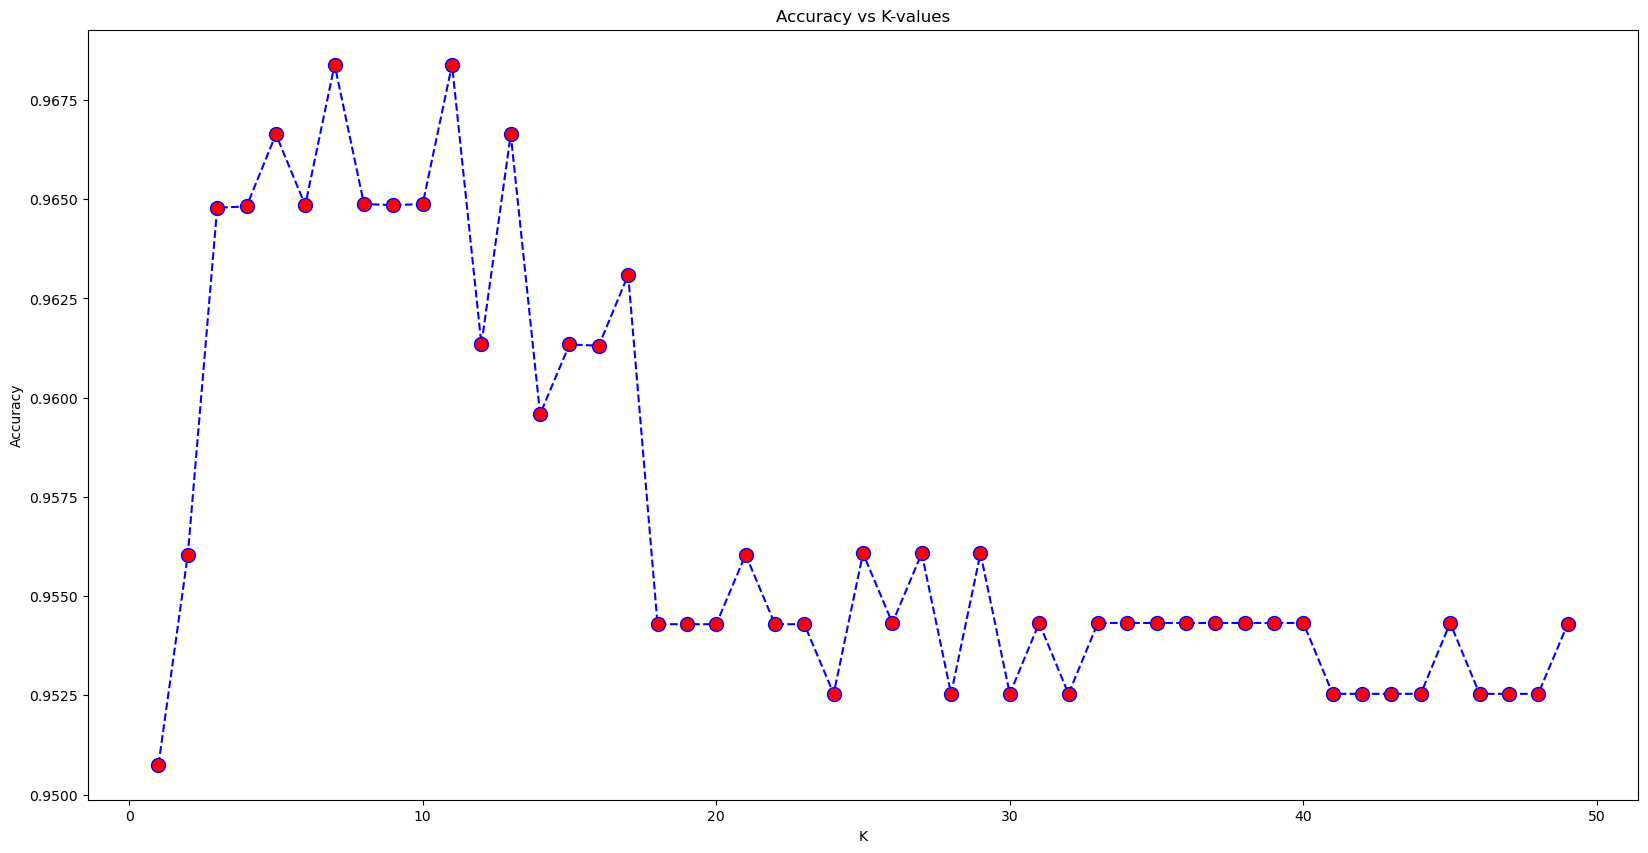

In [29]:
plt.figure(figsize=(20,10))

plt.plot(range(1,50),scores_1,color='blue',ls='--',marker='o', markerfacecolor='red',markersize=10)

plt.title('Accuracy vs K-values')
plt.xlabel('K')
plt.ylabel('Accuracy');

In [30]:
# rebuilding the model selecting K=10

KNN = KNeighborsClassifier(n_neighbors=11, weights='distance')

In [31]:
pm = KNN.fit(X_train,y_train)
pm

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [32]:
round(KNN.score(X_test,y_test)*100,2) # checking the score of the model: KNN.score(X_test,y_test

95.91

Confusion Matrix


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

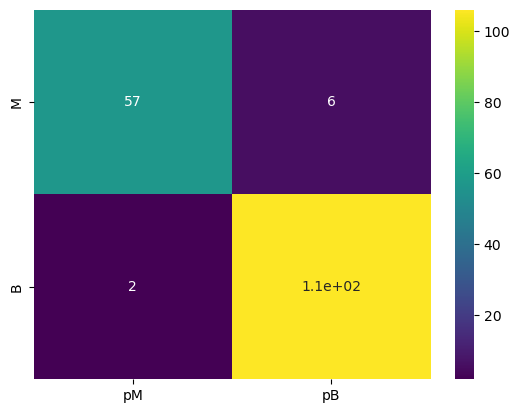

In [33]:
# Perfroming confusion matrix

from sklearn import metrics

print('Confusion Matrix')

cm = metrics.confusion_matrix(y_test, p, labels = ['M','B'])
df_cm = pd.DataFrame(cm, index=[i for i in ['M','B']],columns = [i for i in ['pM','pB']]) # pM:predicte M,pB:predicted B

sns.heatmap(df_cm, annot=True, cmap='viridis');


In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Classification Report')
print(metrics.classification_report(y_test,
                                    p, labels=['M','B']))

Classification Report
              precision    recall  f1-score   support

           M       0.97      0.90      0.93        63
           B       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

